In [1]:
!pip install pandas tensorflow matplotlib scikit-learn opendatasets

In [2]:
import pandas as np
import tensorflow as tf
import os
import numpy as np
import opendatasets as od
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
KAGGLE_LINK = "https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset"
DATASET_PATH = "./fast-food-classification-dataset/Fast Food Classification V2/Train"

IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

In [4]:
od.download(KAGGLE_LINK, force=False)

Skipping, found downloaded files in "./fast-food-classification-dataset" (use force=True to force download)


In [5]:
images = []
class_list = []
label_class = ["Burger", "Fries", "Pizza"]

list_dir = []
for dir in os.listdir(DATASET_PATH):
  if dir in label_class:
    list_dir.append(dir)

for i, class_name in enumerate(list_dir):
  for filename in os.listdir(os.path.join(DATASET_PATH, class_name)):
    image = load_img(os.path.join(DATASET_PATH, class_name, filename))
    image = tf.image.resize(image, [IMAGE_WIDTH, IMAGE_HEIGHT])
    image = img_to_array(image)
    # image = tf.image.rgb_to_grayscale(image)
    image = image / 255.0

    class_list.append(i)
    images.append(image)

  print(f"Loading successful from class {class_name}")

Loading successful from class Fries
Loading successful from class Burger
Loading successful from class Pizza


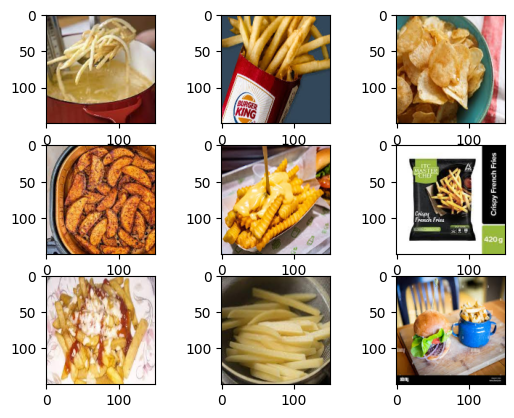

In [6]:
for i in range(9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(images[i], cmap="gray")

plt.show()

In [7]:
y = tf.keras.utils.to_categorical(class_list, num_classes=len(label_class))

In [8]:
# Define Hyperparameters
BATCH_SIZE = 32

In [9]:
# Preprocess Images
images = np.asarray(images)

x_train, x_temp, y_train, y_temp = train_test_split(images, y, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
# Model Creation (AlexNet)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=128, kernel_size=(11, 11), strides=(4, 4), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3, 3)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation="relu", padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [15]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 35, 35, 128)         │          46,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 35, 35, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 17, 17, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 5, 5, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 5, 5, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           3,0

 Total params: 3,694,595 (14.09 MB)

 Trainable params: 3,692,291 (14.08 MB)

 Non-trainable params: 2,304 (9.00 KB)

None


In [12]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

In [21]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_val, y_val),
    batch_size = BATCH_SIZE,
    # callbacks=[early_stopping]
)

Epoch 1/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9816 - loss: 0.0792 - val_accuracy: 0.8089 - val_loss: 1.3122
Epoch 2/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9901 - loss: 0.0303 - val_accuracy: 0.7089 - val_loss: 2.3008
Epoch 3/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9766 - loss: 0.0817 - val_accuracy: 0.7978 - val_loss: 0.9178
Epoch 4/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9844 - loss: 0.0495 - val_accuracy: 0.7756 - val_loss: 1.5547
Epoch 5/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9886 - loss: 0.0390 - val_accuracy: 0.8156 - val_loss: 1.1379
Epoch 6/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9910 - loss: 0.0323 - val_accuracy: 0.6533 - val_loss: 3.1415
Epoch 7/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9722 - loss: 0.0911 - val_accuracy: 0.7089 - val_loss: 1.1876
Epoch 8/20
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9756 - loss: 0.0732 - val_accu

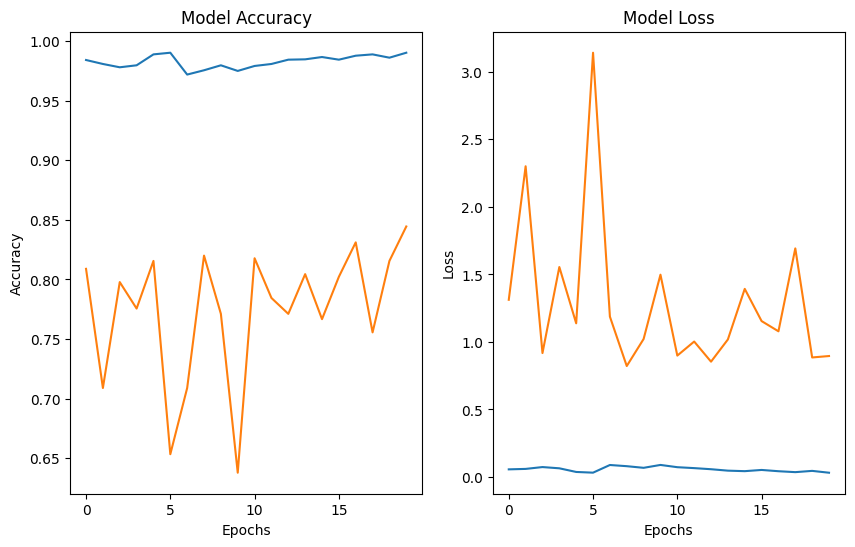

In [22]:
# Plotting Model
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.show()

In [23]:
# Evaluating Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7993 - loss: 1.1181
Test Loss: 1.1431736946105957
Test Accuracy: 0.8022222518920898


In [24]:
model.save("DCNN.h5")